In [1]:
import anndata as ad
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import colorcet as cc
%matplotlib inline

# Load and subset data

In [2]:
adata_brain1 = ad.read_h5ad("../data/merfish_609882_AIT17.1_annotated_TH_ZI_only_2023-02-16_00-00-00/atlas_brain_609882_AIT17_1_annotated_TH_ZI_only.h5ad") #, backed='r')
adata_brain3 = ad.read_h5ad("../data/merfish_638850_AIT17.custom_CCF_annotated_TH_ZI_only_2023-05-04_00-00-00/atlas_brain_638850_AIT17_custom_CCF_annotated_TH_ZI_only.h5ad") #, backed='r')

In [3]:
# same as class_id_label here, but I think 'division' is the correct term
adata_brain1.obs['division_id_label'].value_counts()

3 PAL-sAMY-TH-HY-MB-HB neuronal    178757
5 Neuroglial                       173814
6 Vascular                          50300
2 Subpallium GABAergic               5570
7 Immune                             5159
4 CBX-MOB-other neuronal              778
1 Pallium glutamatergic                56
Name: division_id_label, dtype: int64

## Subset to a single section 

for convenience - possible to take a larger or smaller subset.

In [4]:
divisions = [
    '3 PAL-sAMY-TH-HY-MB-HB neuronal', 
    # '2 Subpallium GABAergic'
]
section_brain1 = '1198980101'
section_brain3 = '1199651048'

adata_brain1 = adata_brain1[adata_brain1.obs['division_id_label'].isin(divisions) & (adata_brain1.obs['section']==section_brain1)].copy()
adata_brain3 = adata_brain3[adata_brain3.obs['division_id_label'].isin(divisions) & (adata_brain3.obs['section']==section_brain3)].copy()

In [5]:
adata_brain1

AnnData object with n_obs × n_vars = 10738 × 702
    obs: 'fov', 'volume', 'center_x', 'center_y', 'min_x', 'min_y', 'max_x', 'max_y', 'barcodeCount', 'corrected_x', 'corrected_y', 'origin', 'rotation', 'section', 'animal', 'species', 'merscope', 'target_atlas_plate', 'coverslip_batch', 'section_date', 'codebook', 'min_genes', 'min_total_reads', 'min_vol', 'genes_detected', 'total_reads', 'total_blanks', 'spot_density', 'max_blank_count', 'blanks_detected', 'cell_qc', 'best.cl', 'cluster_label', 'cluster_id', 'Level1_id_label', 'Level2_id_label', 'class_id_label', 'combo.markers', 'clean_region_label', 'prob', 'avg.dist', 'avg.path.cor', 'avg.cor', 'cor.zscore', 'division_id_label', 'subclass_id_label', 'supertype_id_label', 'napari_x', 'napari_y', 'is_in_TH_or_ZI'
    uns: 'thalamus_polygons'
    obsm: 'spatial', 'spatial_cirro', 'spatial_rotated'
    layers: 'log2p', 'raw'

In [6]:
adata_brain3

AnnData object with n_obs × n_vars = 10306 × 550
    obs: 'fov', 'volume', 'center_x', 'center_y', 'min_x', 'min_y', 'max_x', 'max_y', 'barcodeCount', 'corrected_x', 'corrected_y', 'origin', 'rotation', 'section', 'animal', 'merscope', 'target_atlas_plate', 'codebook', 'min_genes', 'min_total_reads', 'min_vol', 'genes_detected', 'total_reads', 'total_blanks', 'spot_density', 'max_blank_count', 'blanks_detected', 'cell_qc', 'best.cl', 'clean_region_label', 'prob', 'avg.dist', 'avg.path.cor', 'avg.cor', 'cor.zscore', 'cluster_id', 'cluster_label', 'supertype_id_label', 'Level2_id_label', 'Level1_id_label', 'class_id_label', 'cluster_id.AIT16', 'nt_type_label', 'luster_id', 'subclass_id_label', 'He.label', 'He.cor', 'class_label', 'division_label', 'division_id_label', 'subclass_label', 'supertype_label', 'nt_type_combo_label', 'CCF_landmark', 'CCF_bin_x', 'CCF_bin_y', 'CCF_bin_z', 'structures_id', 'CCF_acronym', 'CCF_analysis', 'CCF_broad', 'napari_x', 'napari_y', 'is_in_TH_or_ZI'
    un

# Cell type mapping labels

In [7]:
# log_genes = pd.DataFrame(adata.layers['log2p'], index=adata.obs_names, columns=adata.var_names)
# coord = pd.DataFrame(adata.obsm['spatial_cirro'], index=adata.obs_names, columns=['x','y'])

adata_brain1.obs['cirro_x'] = adata_brain1.obsm['spatial_cirro'][:,0]
adata_brain1.obs['cirro_y'] = adata_brain1.obsm['spatial_cirro'][:,1]

adata_brain3.obs['cirro_x'] = adata_brain3.obsm['spatial_cirro'][:,0]
adata_brain3.obs['cirro_y'] = adata_brain3.obsm['spatial_cirro'][:,1]

## Cluster level

Two very different ways of visualizing cluster labels, emphasizing similarity (top, via cluster_id) vs distinctness (bottom, via cluster_label) of 'adjacent' clusters.

### Cluster IDs

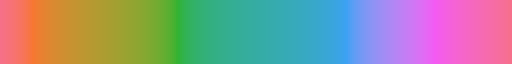

In [8]:
sns.color_palette('husl', as_cmap=True)

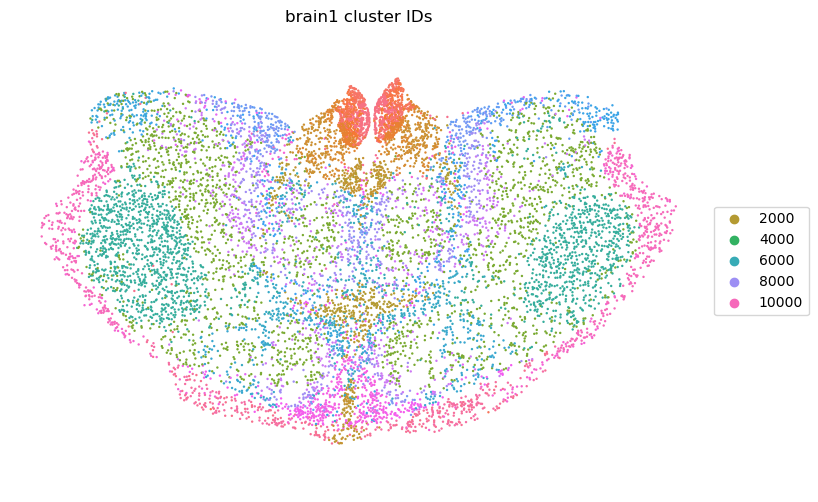

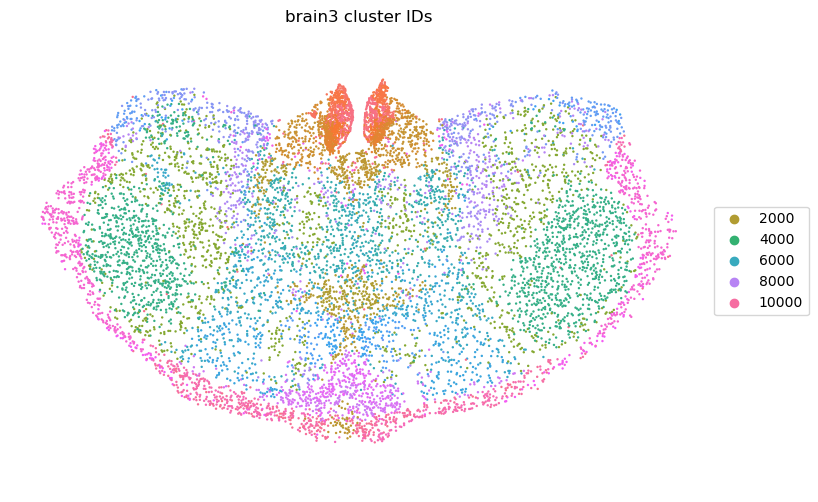

In [9]:
# brain 1
plt.figure(figsize=(9,6))
sc = sns.scatterplot(data=adata_brain1.obs, x='cirro_x', y='cirro_y', 
                     hue=adata_brain1.obs['cluster_id'].rank(), 
                     palette='husl', 
                     alpha=1, s=3, linewidth=0,
                     legend=True)

# formatting cleanup
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.axis('equal')
plt.title('brain1 cluster IDs')
sc.set(xlabel=None, ylabel=None, xticklabels=[], yticklabels=[])
sc.tick_params(left=False, bottom=False)
sc.spines[['right', 'left','top','bottom']].set_visible(False)


# brain3
plt.figure(figsize=(9,6))
sc = sns.scatterplot(data=adata_brain3.obs, x='cirro_x', y='cirro_y', 
                     hue=adata_brain3.obs['cluster_id'].rank(), 
                     palette='husl', 
                     alpha=1, s=3, linewidth=0,
                     legend=True)

# formatting cleanup
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.axis('equal')
plt.title('brain3 cluster IDs')
sc.set(xlabel=None, ylabel=None, xticklabels=[], yticklabels=[])
sc.tick_params(left=False, bottom=False)
sc.spines[['right', 'left','top','bottom']].set_visible(False)

### Cluster labels

In [10]:
cluster_labels = sorted(list(set(adata_brain1.obs['cluster_label']) | set(adata_brain3.obs['cluster_label'])))
nclust = len(cluster_labels)
clust_palette = sns.color_palette(cc.glasbey, n_colors=nclust)
clust_dict = dict(zip(cluster_labels,clust_palette))
clust_palette

[(0.8392156862745098, 0.0, 0.0),
 (0.5490196078431373, 0.23137254901960785, 1.0),
 (0.00392156862745098, 0.5294117647058824, 0.0),
 (0.0, 0.6745098039215687, 0.7764705882352941),
 (0.592156862745098, 1.0, 0.0),
 (1.0, 0.49411764705882355, 0.8196078431372549),
 (0.4196078431372549, 0.0, 0.30980392156862746),
 (1.0, 0.6470588235294118, 0.1843137254901961),
 (0.3411764705882353, 0.23137254901960785, 0.0),
 (0.0, 0.33725490196078434, 0.34901960784313724),
 (0.0, 0.0, 0.8666666666666667),
 (0.0, 0.9921568627450981, 0.8117647058823529),
 (0.6313725490196078, 0.4588235294117647, 0.4117647058823529),
 (0.7372549019607844, 0.7137254901960784, 1.0),
 (0.5843137254901961, 0.7098039215686275, 0.4666666666666667),
 (0.7490196078431373, 0.011764705882352941, 0.7215686274509804),
 (0.39215686274509803, 0.32941176470588235, 0.4549019607843137),
 (0.4745098039215686, 0.0, 0.0),
 (0.027450980392156862, 0.4549019607843137, 0.8470588235294118),
 (0.9921568627450981, 0.9568627450980393, 0.5647058823529412),
 (0.0, 0.29411764705882354, 0.0),
 (0.5568627450980392, 0.4745098039215686, 0.0),
 (1.0, 0.4470588235294118, 0.4),
 (0.9294117647058824, 0.7215686274509804, 0.7215686274509804),
 (0.36470588235294116, 0.49411764705882355, 0.4),
 (0.6039215686274509, 0.8941176470588236, 1.0),
 (0.9215686274509803, 0.0, 0.4666666666666667),
 (0.6470588235294118, 0.4823529411764706, 0.7215686274509804),
 (0.34901960784313724, 0.0, 0.6392156862745098),
 (0.011764705882352941, 0.7764705882352941, 0.0),
 (0.6196078431372549, 0.29411764705882354, 0.0),
 (0.611764705882353, 0.23137254901960785, 0.30980392156862746),
 (0.792156862745098, 0.7647058823529411, 0.0),
 (0.4392156862745098, 0.5098039215686274, 0.592156862745098),
 (0.0, 0.6862745098039216, 0.5372549019607843),
 (0.5098039215686274, 0.5294117647058824, 1.0),
 (0.36470588235294116, 0.21176470588235294, 0.23137254901960785),
 (0.2196078431372549, 0.0, 0.0),
 (0.9921568627450981, 0.7490196078431373, 1.0),
 (0.7411764705882353, 0.9019607843137255, 0.7490196078431373),
 (0.8588235294117647, 0.42745098039215684, 0.00392156862745098),
 (0.5764705882352941, 0.7215686274509804, 0.7098039215686275),
 (0.8941176470588236, 0.3215686274509804, 1.0),
 (0.1843137254901961, 0.3215686274509804, 0.5098039215686274),
 (0.7647058823529411, 0.4, 0.5647058823529412),
 (0.32941176470588235, 0.3843137254901961, 0.12156862745098039),
 (0.7686274509803922, 0.6196078431372549, 0.4470588235294118),
 (0.011764705882352941, 0.5098039215686274, 0.5294117647058824),
 (0.4117647058823529, 0.9019607843137255, 0.5019607843137255),
 (0.5019607843137255, 0.14901960784313725, 0.5647058823529412),
 (0.42745098039215684, 0.7019607843137254, 1.0),
 (0.30196078431372547, 0.2, 1.0),
 (0.5215686274509804, 0.6392156862745098, 0.00392156862745098),
 (0.9921568627450981, 0.011764705882352941, 0.792156862745098),
 (0.7568627450980392, 0.6470588235294118, 0.7686274509803922),
 (0.7686274509803922, 0.33725490196078434, 0.27450980392156865),
 (0.4588235294117647, 0.3411764705882353, 0.23921568627450981),
 (0.00392156862745098, 0.403921568627451, 0.25882352941176473),
 (0.0, 0.8392156862745098, 0.8313725490196079),
 (0.8549019607843137, 0.8745098039215686, 1.0),
 (0.9764705882352941, 1.0, 0.0),
 (0.4117647058823529, 0.403921568627451, 0.6862745098039216),
 (0.7647058823529411, 0.592156862745098, 0.0),
 (0.8823529411764706, 0.803921568627451, 0.611764705882353),
 (0.8549019607843137, 0.5843137254901961, 1.0),
 (0.7294117647058823, 0.011764705882352941, 0.9921568627450981),
 (0.5686274509803921, 0.3215686274509804, 0.5098039215686274),
 (0.6274509803921569, 0.0, 0.4470588235294118),
 (0.33725490196078434, 0.6039215686274509, 0.32941176470588235),
 (0.8274509803921568, 0.5490196078431373, 0.5568627450980392),
 (0.21176470588235294, 0.26666666666666666, 0.14901960784313725),
 (0.592156862745098, 0.6470588235294118, 0.7647058823529411),
 (0.5568627450980392, 0.5490196078431373, 0.3686274509803922),
 (1.0, 0.27450980392156865, 0.0),
 (0.7843137254901961, 1.0, 0.97647

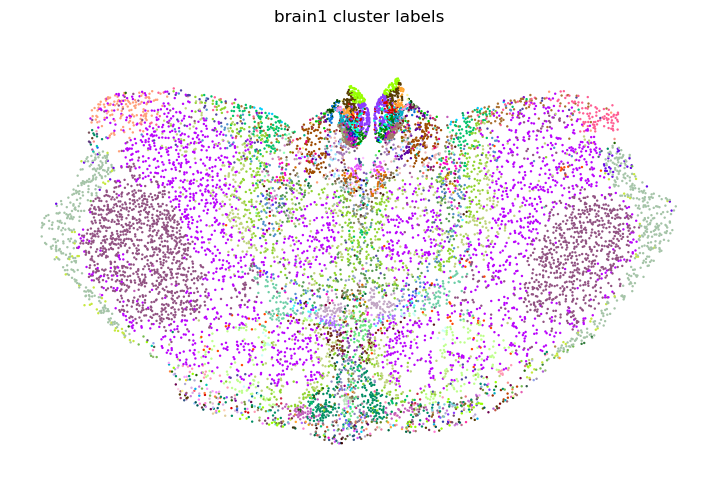

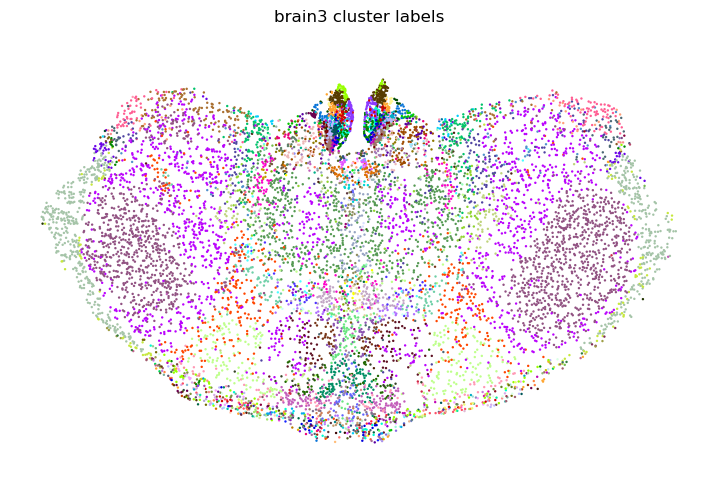

In [11]:
# brain1
plt.figure(figsize=(9,6))
sc = sns.scatterplot(data=adata_brain1.obs, x='cirro_x', y='cirro_y', 
                     hue=adata_brain1.obs['cluster_label'], 
                     palette=clust_dict,
                     alpha=1, s=3, linewidth=0,
                     legend=False)

# formatting cleanup
# plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.axis('equal')
plt.title('brain1 cluster labels')
sc.set(xlabel=None, ylabel=None, xticklabels=[], yticklabels=[])
sc.tick_params(left=False, bottom=False)
sc.spines[['right', 'left','top','bottom']].set_visible(False)


# brain3
plt.figure(figsize=(9,6))
sc = sns.scatterplot(data=adata_brain3.obs, x='cirro_x', y='cirro_y', 
                     hue=adata_brain3.obs['cluster_label'], 
                     palette=clust_dict,
                     alpha=1, s=3, linewidth=0,
                     legend=False)

# formatting cleanup
# plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.axis('equal')
plt.title('brain3 cluster labels')
sc.set(xlabel=None, ylabel=None, xticklabels=[], yticklabels=[])
sc.tick_params(left=False, bottom=False)
sc.spines[['right', 'left','top','bottom']].set_visible(False)

## Supertype level

In [12]:
st_labels = sorted(list(set(adata_brain1.obs['supertype_id_label']) | set(adata_brain3.obs['supertype_id_label'])))
n_st = len(st_labels)
st_palette = sns.color_palette(cc.glasbey, n_colors=n_st)
st_dict = dict(zip(st_labels,st_palette))
st_palette

[(0.8392156862745098, 0.0, 0.0),
 (0.5490196078431373, 0.23137254901960785, 1.0),
 (0.00392156862745098, 0.5294117647058824, 0.0),
 (0.0, 0.6745098039215687, 0.7764705882352941),
 (0.592156862745098, 1.0, 0.0),
 (1.0, 0.49411764705882355, 0.8196078431372549),
 (0.4196078431372549, 0.0, 0.30980392156862746),
 (1.0, 0.6470588235294118, 0.1843137254901961),
 (0.3411764705882353, 0.23137254901960785, 0.0),
 (0.0, 0.33725490196078434, 0.34901960784313724),
 (0.0, 0.0, 0.8666666666666667),
 (0.0, 0.9921568627450981, 0.8117647058823529),
 (0.6313725490196078, 0.4588235294117647, 0.4117647058823529),
 (0.7372549019607844, 0.7137254901960784, 1.0),
 (0.5843137254901961, 0.7098039215686275, 0.4666666666666667),
 (0.7490196078431373, 0.011764705882352941, 0.7215686274509804),
 (0.39215686274509803, 0.32941176470588235, 0.4549019607843137),
 (0.4745098039215686, 0.0, 0.0),
 (0.027450980392156862, 0.4549019607843137, 0.8470588235294118),
 (0.9921568627450981, 0.9568627450980393, 0.5647058823529412),
 (0.0, 0.29411764705882354, 0.0),
 (0.5568627450980392, 0.4745098039215686, 0.0),
 (1.0, 0.4470588235294118, 0.4),
 (0.9294117647058824, 0.7215686274509804, 0.7215686274509804),
 (0.36470588235294116, 0.49411764705882355, 0.4),
 (0.6039215686274509, 0.8941176470588236, 1.0),
 (0.9215686274509803, 0.0, 0.4666666666666667),
 (0.6470588235294118, 0.4823529411764706, 0.7215686274509804),
 (0.34901960784313724, 0.0, 0.6392156862745098),
 (0.011764705882352941, 0.7764705882352941, 0.0),
 (0.6196078431372549, 0.29411764705882354, 0.0),
 (0.611764705882353, 0.23137254901960785, 0.30980392156862746),
 (0.792156862745098, 0.7647058823529411, 0.0),
 (0.4392156862745098, 0.5098039215686274, 0.592156862745098),
 (0.0, 0.6862745098039216, 0.5372549019607843),
 (0.5098039215686274, 0.5294117647058824, 1.0),
 (0.36470588235294116, 0.21176470588235294, 0.23137254901960785),
 (0.2196078431372549, 0.0, 0.0),
 (0.9921568627450981, 0.7490196078431373, 1.0),
 (0.7411764705882353, 0.9019607843137255, 0.7490196078431373),
 (0.8588235294117647, 0.42745098039215684, 0.00392156862745098),
 (0.5764705882352941, 0.7215686274509804, 0.7098039215686275),
 (0.8941176470588236, 0.3215686274509804, 1.0),
 (0.1843137254901961, 0.3215686274509804, 0.5098039215686274),
 (0.7647058823529411, 0.4, 0.5647058823529412),
 (0.32941176470588235, 0.3843137254901961, 0.12156862745098039),
 (0.7686274509803922, 0.6196078431372549, 0.4470588235294118),
 (0.011764705882352941, 0.5098039215686274, 0.5294117647058824),
 (0.4117647058823529, 0.9019607843137255, 0.5019607843137255),
 (0.5019607843137255, 0.14901960784313725, 0.5647058823529412),
 (0.42745098039215684, 0.7019607843137254, 1.0),
 (0.30196078431372547, 0.2, 1.0),
 (0.5215686274509804, 0.6392156862745098, 0.00392156862745098),
 (0.9921568627450981, 0.011764705882352941, 0.792156862745098),
 (0.7568627450980392, 0.6470588235294118, 0.7686274509803922),
 (0.7686274509803922, 0.33725490196078434, 0.27450980392156865),
 (0.4588235294117647, 0.3411764705882353, 0.23921568627450981),
 (0.00392156862745098, 0.403921568627451, 0.25882352941176473),
 (0.0, 0.8392156862745098, 0.8313725490196079),
 (0.8549019607843137, 0.8745098039215686, 1.0),
 (0.9764705882352941, 1.0, 0.0),
 (0.4117647058823529, 0.403921568627451, 0.6862745098039216),
 (0.7647058823529411, 0.592156862745098, 0.0),
 (0.8823529411764706, 0.803921568627451, 0.611764705882353),
 (0.8549019607843137, 0.5843137254901961, 1.0),
 (0.7294117647058823, 0.011764705882352941, 0.9921568627450981),
 (0.5686274509803921, 0.3215686274509804, 0.5098039215686274),
 (0.6274509803921569, 0.0, 0.4470588235294118),
 (0.33725490196078434, 0.6039215686274509, 0.32941176470588235),
 (0.8274509803921568, 0.5490196078431373, 0.5568627450980392),
 (0.21176470588235294, 0.26666666666666666, 0.14901960784313725),
 (0.592156862745098, 0.6470588235294118, 0.7647058823529411),
 (0.5568627450980392, 0.5490196078431373, 0.3686274509803922),
 (1.0, 0.27450980392156865, 0.0),
 (0.7843137254901961, 1.0, 0.97647

<ipython-input-13-801347123b11>:3: UserWarning: The palette list has more values (169) than needed (104), which may not be intended.
  sc = sns.scatterplot(data=adata_brain1.obs, x='cirro_x', y='cirro_y',
<ipython-input-13-801347123b11>:19: UserWarning: The palette list has more values (169) than needed (138), which may not be intended.
  sc = sns.scatterplot(data=adata_brain3.obs, x='cirro_x', y='cirro_y',


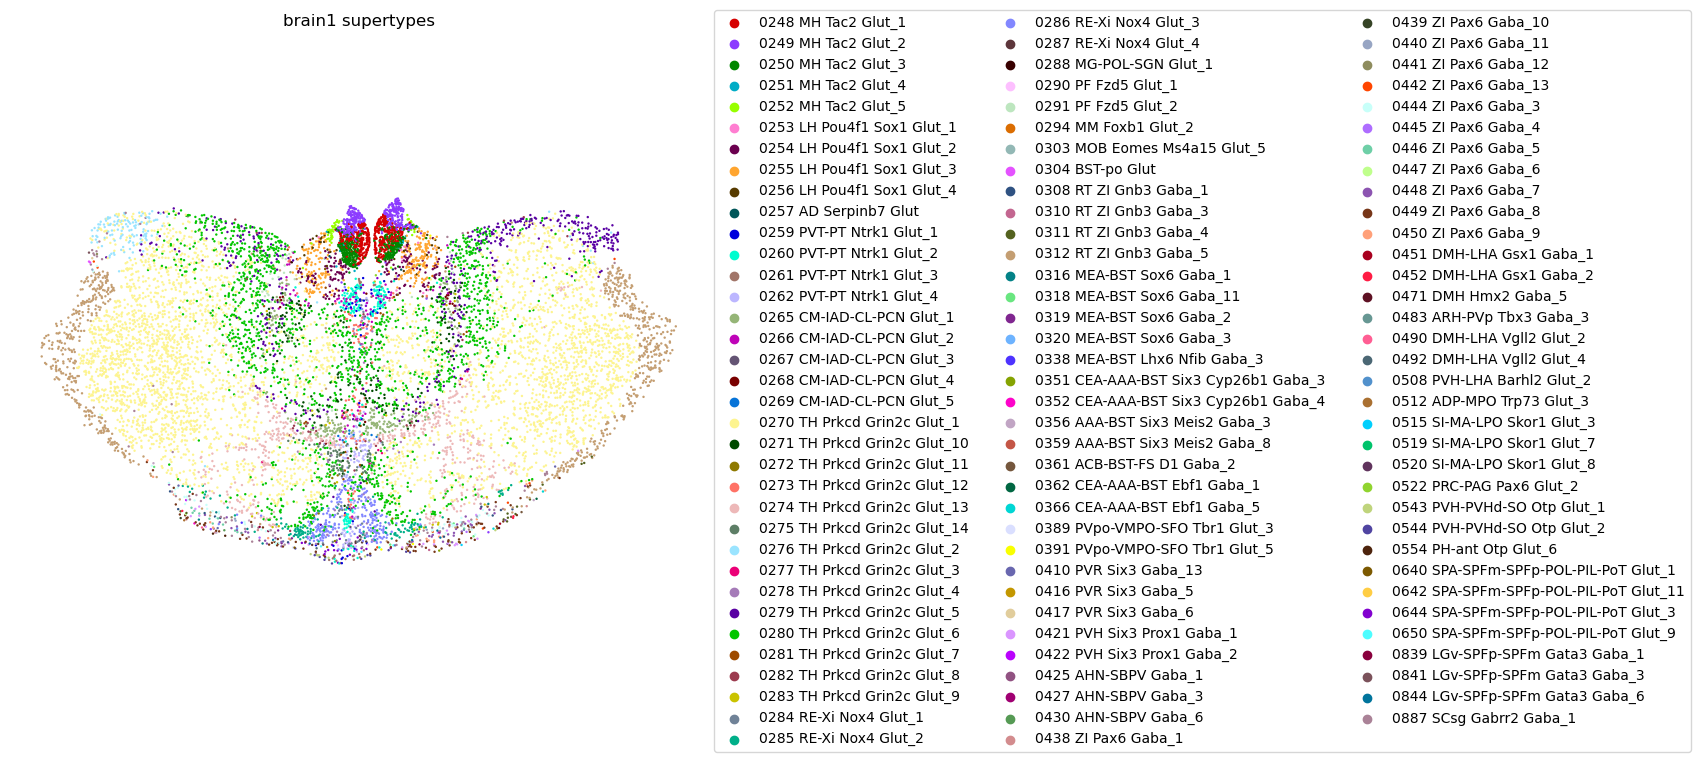

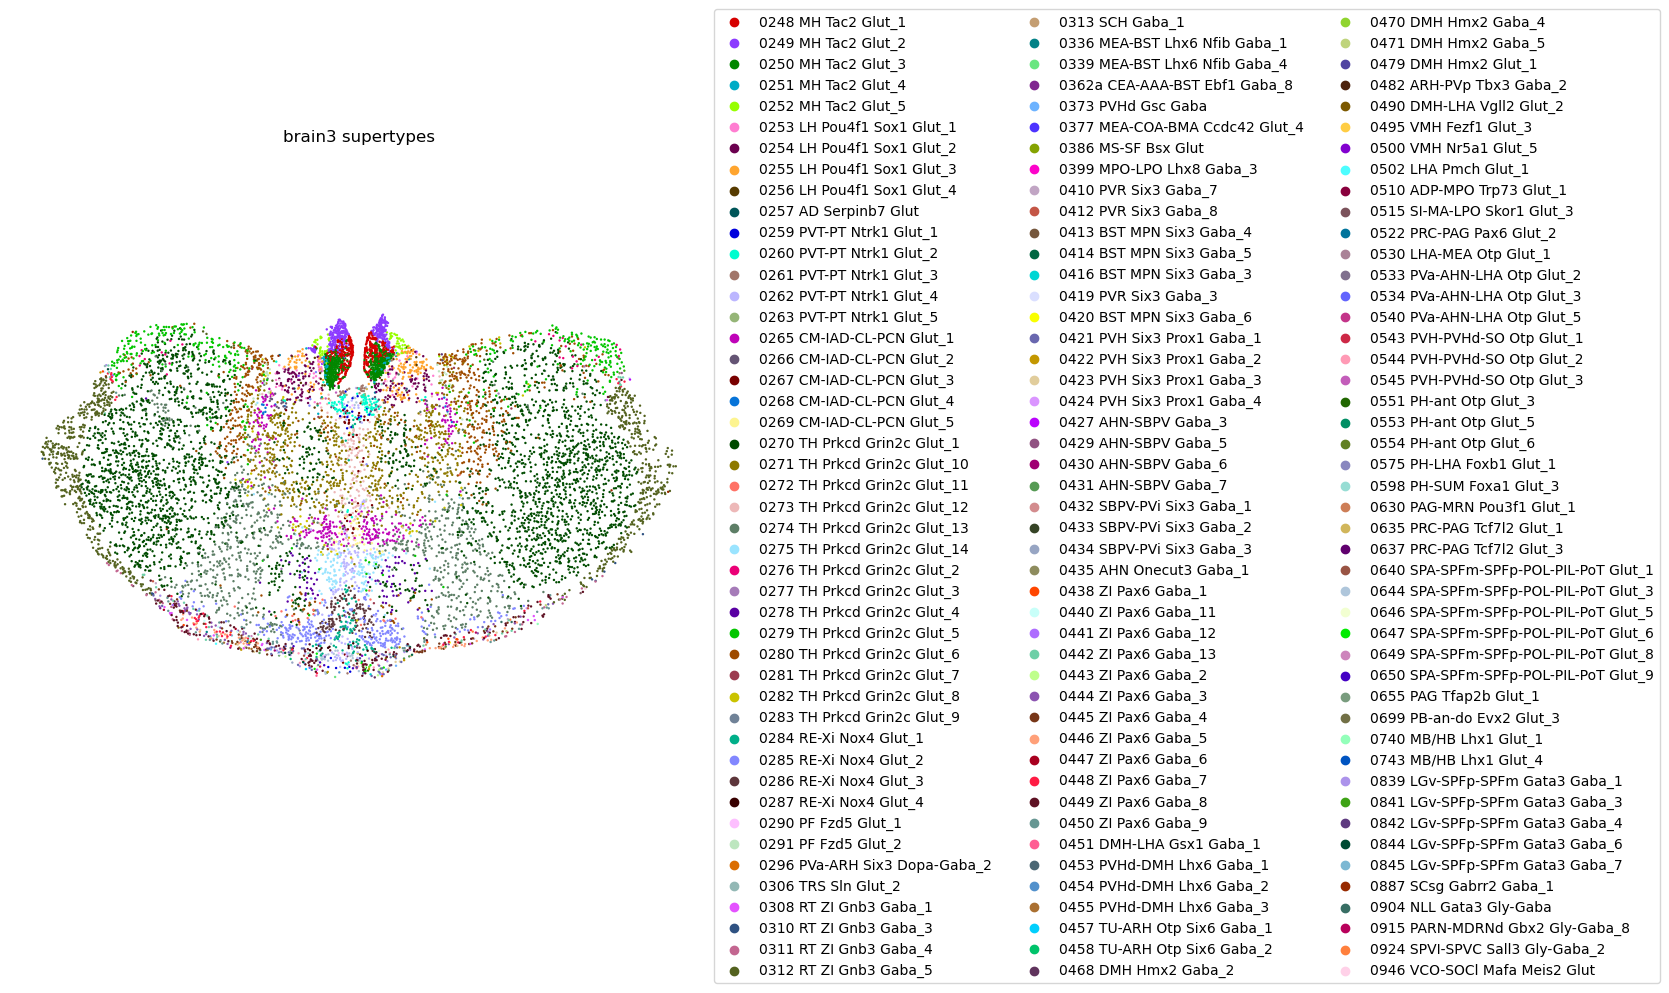

In [13]:
# brain1
plt.figure(figsize=(9,9))
sc = sns.scatterplot(data=adata_brain1.obs, x='cirro_x', y='cirro_y',
                     hue=adata_brain1.obs['supertype_id_label'], 
                     palette=st_palette, 
                     alpha=1, s=3, linewidth=0,
                     legend=True)

# formatting cleanup
plt.legend(loc='center left', bbox_to_anchor=(1,0.5), ncol=3)
plt.axis('equal')
plt.title('brain1 supertypes')
sc.set(xlabel=None, ylabel=None, xticklabels=[], yticklabels=[])
sc.tick_params(left=False, bottom=False)
sc.spines[['right', 'left','top','bottom']].set_visible(False)

# brain3
plt.figure(figsize=(9,9))
sc = sns.scatterplot(data=adata_brain3.obs, x='cirro_x', y='cirro_y',
                     hue=adata_brain3.obs['supertype_id_label'], 
                     palette=st_palette, 
                     alpha=1, s=3, linewidth=0,
                     legend=True)

# formatting cleanup
plt.legend(loc='center left', bbox_to_anchor=(1,0.5), ncol=3)
plt.axis('equal')
plt.title('brain3 supertypes')
sc.set(xlabel=None, ylabel=None, xticklabels=[], yticklabels=[])
sc.tick_params(left=False, bottom=False)
sc.spines[['right', 'left','top','bottom']].set_visible(False)

## Subclass level

In [14]:
sbc_labels = sorted(list(set(adata_brain1.obs['subclass_id_label']) | set(adata_brain3.obs['subclass_id_label'])))
n_sbc = len(sbc_labels)
sbc_palette = sns.color_palette(cc.glasbey, n_colors=n_sbc)
sbc_dict = dict(zip(sbc_labels,sbc_palette))
sbc_palette

[(0.8392156862745098, 0.0, 0.0),
 (0.5490196078431373, 0.23137254901960785, 1.0),
 (0.00392156862745098, 0.5294117647058824, 0.0),
 (0.0, 0.6745098039215687, 0.7764705882352941),
 (0.592156862745098, 1.0, 0.0),
 (1.0, 0.49411764705882355, 0.8196078431372549),
 (0.4196078431372549, 0.0, 0.30980392156862746),
 (1.0, 0.6470588235294118, 0.1843137254901961),
 (0.3411764705882353, 0.23137254901960785, 0.0),
 (0.0, 0.33725490196078434, 0.34901960784313724),
 (0.0, 0.0, 0.8666666666666667),
 (0.0, 0.9921568627450981, 0.8117647058823529),
 (0.6313725490196078, 0.4588235294117647, 0.4117647058823529),
 (0.7372549019607844, 0.7137254901960784, 1.0),
 (0.5843137254901961, 0.7098039215686275, 0.4666666666666667),
 (0.7490196078431373, 0.011764705882352941, 0.7215686274509804),
 (0.39215686274509803, 0.32941176470588235, 0.4549019607843137),
 (0.4745098039215686, 0.0, 0.0),
 (0.027450980392156862, 0.4549019607843137, 0.8470588235294118),
 (0.9921568627450981, 0.9568627450980393, 0.5647058823529412),
 (0.0, 0.29411764705882354, 0.0),
 (0.5568627450980392, 0.4745098039215686, 0.0),
 (1.0, 0.4470588235294118, 0.4),
 (0.9294117647058824, 0.7215686274509804, 0.7215686274509804),
 (0.36470588235294116, 0.49411764705882355, 0.4),
 (0.6039215686274509, 0.8941176470588236, 1.0),
 (0.9215686274509803, 0.0, 0.4666666666666667),
 (0.6470588235294118, 0.4823529411764706, 0.7215686274509804),
 (0.34901960784313724, 0.0, 0.6392156862745098),
 (0.011764705882352941, 0.7764705882352941, 0.0),
 (0.6196078431372549, 0.29411764705882354, 0.0),
 (0.611764705882353, 0.23137254901960785, 0.30980392156862746),
 (0.792156862745098, 0.7647058823529411, 0.0),
 (0.4392156862745098, 0.5098039215686274, 0.592156862745098),
 (0.0, 0.6862745098039216, 0.5372549019607843),
 (0.5098039215686274, 0.5294117647058824, 1.0),
 (0.36470588235294116, 0.21176470588235294, 0.23137254901960785),
 (0.2196078431372549, 0.0, 0.0),
 (0.9921568627450981, 0.7490196078431373, 1.0),
 (0.7411764705882353, 0.9019607843137255, 0.7490196078431373),
 (0.8588235294117647, 0.42745098039215684, 0.00392156862745098),
 (0.5764705882352941, 0.7215686274509804, 0.7098039215686275),
 (0.8941176470588236, 0.3215686274509804, 1.0),
 (0.1843137254901961, 0.3215686274509804, 0.5098039215686274),
 (0.7647058823529411, 0.4, 0.5647058823529412),
 (0.32941176470588235, 0.3843137254901961, 0.12156862745098039),
 (0.7686274509803922, 0.6196078431372549, 0.4470588235294118),
 (0.011764705882352941, 0.5098039215686274, 0.5294117647058824),
 (0.4117647058823529, 0.9019607843137255, 0.5019607843137255),
 (0.5019607843137255, 0.14901960784313725, 0.5647058823529412),
 (0.42745098039215684, 0.7019607843137254, 1.0),
 (0.30196078431372547, 0.2, 1.0),
 (0.5215686274509804, 0.6392156862745098, 0.00392156862745098),
 (0.9921568627450981, 0.011764705882352941, 0.792156862745098),
 (0.7568627450980392, 0.6470588235294118, 0.7686274509803922),
 (0.7686274509803922, 0.33725490196078434, 0.27450980392156865),
 (0.4588235294117647, 0.3411764705882353, 0.23921568627450981),
 (0.00392156862745098, 0.403921568627451, 0.25882352941176473),
 (0.0, 0.8392156862745098, 0.8313725490196079),
 (0.8549019607843137, 0.8745098039215686, 1.0),
 (0.9764705882352941, 1.0, 0.0),
 (0.4117647058823529, 0.403921568627451, 0.6862745098039216),
 (0.7647058823529411, 0.592156862745098, 0.0),
 (0.8823529411764706, 0.803921568627451, 0.611764705882353),
 (0.8549019607843137, 0.5843137254901961, 1.0),
 (0.7294117647058823, 0.011764705882352941, 0.9921568627450981)]

<ipython-input-15-daa7613014c0>:3: UserWarning: The palette list has more values (66) than needed (37), which may not be intended.
  sc = sns.scatterplot(data=adata_brain1.obs, x='cirro_x', y='cirro_y',
<ipython-input-15-daa7613014c0>:20: UserWarning: The palette list has more values (66) than needed (56), which may not be intended.
  sc = sns.scatterplot(data=adata_brain3.obs, x='cirro_x', y='cirro_y',


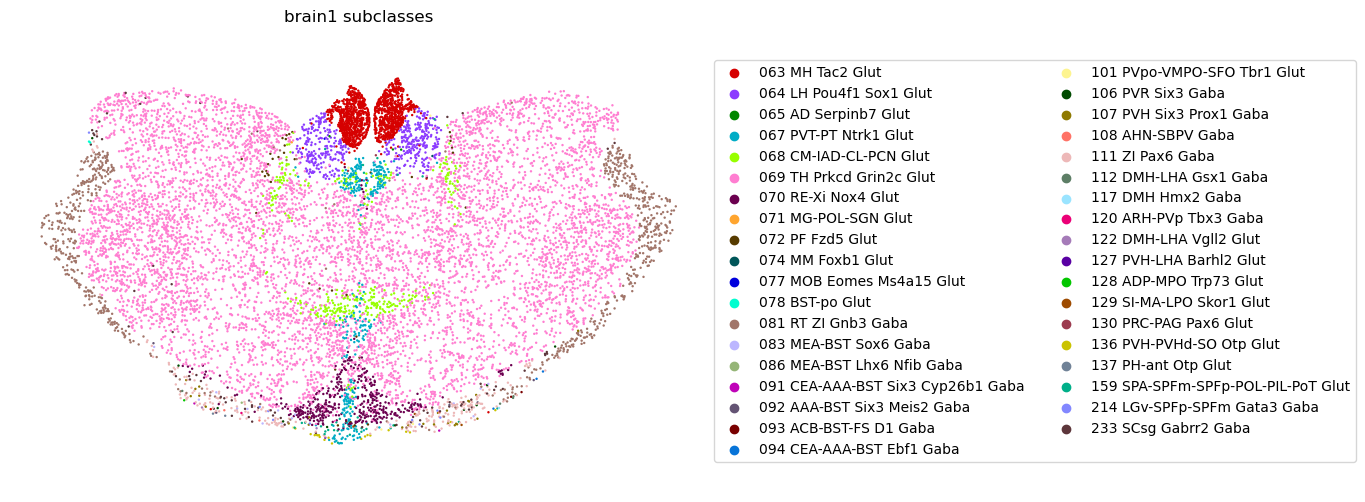

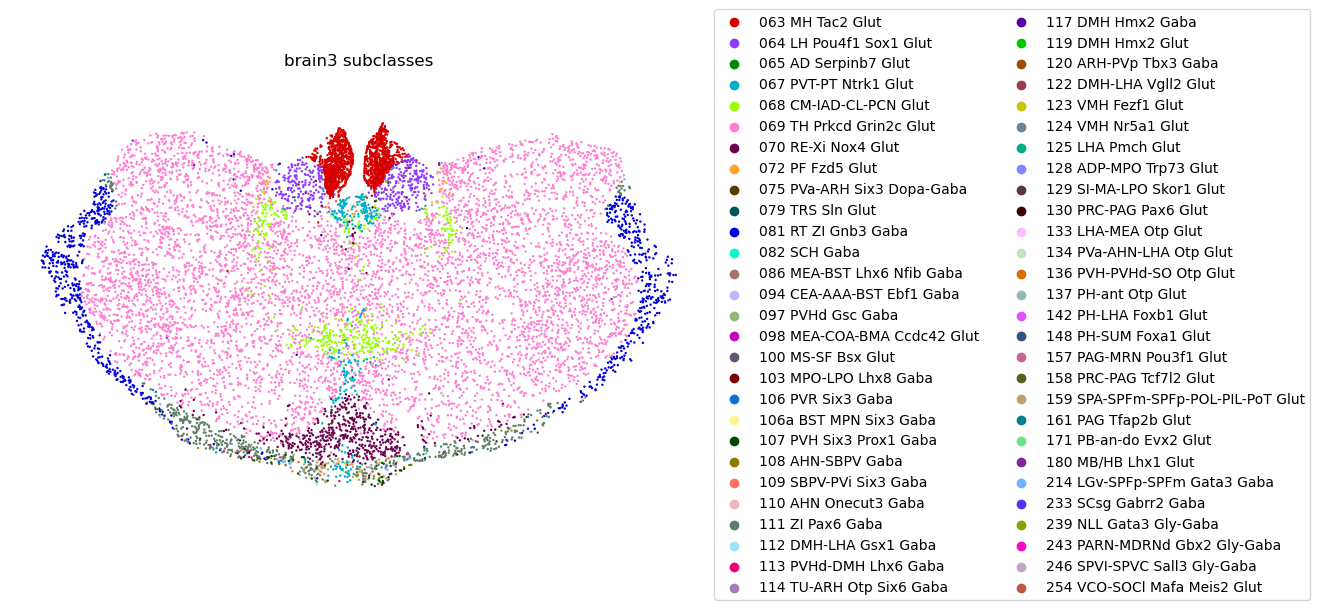

In [15]:
# brain1
plt.figure(figsize=(9,6))
sc = sns.scatterplot(data=adata_brain1.obs, x='cirro_x', y='cirro_y',
                     hue=adata_brain1.obs['subclass_id_label'], 
                     palette=sbc_palette, 
                     alpha=1, s=3, linewidth=0,
                     legend=True)

# formatting cleanup
plt.legend(loc='center left', bbox_to_anchor=(1,0.5), ncol=2)
plt.axis('equal')
plt.title('brain1 subclasses')
sc.set(xlabel=None, ylabel=None, xticklabels=[], yticklabels=[])
sc.tick_params(left=False, bottom=False)
sc.spines[['right', 'left','top','bottom']].set_visible(False)


# brain3
plt.figure(figsize=(9,6))
sc = sns.scatterplot(data=adata_brain3.obs, x='cirro_x', y='cirro_y',
                     hue=adata_brain3.obs['subclass_id_label'], 
                     palette=sbc_palette, 
                     alpha=1, s=3, linewidth=0,
                     legend=True)

# formatting cleanup
plt.legend(loc='center left', bbox_to_anchor=(1,0.5), ncol=2)
plt.axis('equal')
plt.title('brain3 subclasses')
sc.set(xlabel=None, ylabel=None, xticklabels=[], yticklabels=[])
sc.tick_params(left=False, bottom=False)
sc.spines[['right', 'left','top','bottom']].set_visible(False)